# lib 로딩과 데이터 로딩

In [58]:
import pandas as pd
import numpy as np

In [2]:
# datas_ml/Salary_Data.csv
data_path = 'datas_ml/Salary_Data.csv'
df = pd.read_csv(data_path)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## [목표] 경력에 따른 연봉 예측

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
# 종속변수(target, label)
y=df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [15]:
# 독립변수(Feature)
x=df['YearsExperience']
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [33]:
type(x)

pandas.core.frame.DataFrame

In [39]:
x = x.squeeze()

In [40]:
# 1D 시리즈 -> 2D df로 변환 <= 머신러닝에 넣기 위해
x = x.to_frame()
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
# 머신러닝은 x(독립변수)가 1개여도 2D여야함

# 피처스케일링
- 독립변수가 1개여서 할 필요가 없음

## Train, Test 데이터로 분할

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split(x, y, test_size=0.2)

[22     7.9
 24     8.7
 16     5.1
 19     6.0
 18     5.9
 6      3.0
 20     6.8
 2      1.5
 10     3.9
 12     4.0
 15     4.9
 14     4.5
 5      2.9
 11     4.0
 3      2.0
 1      1.3
 9      3.7
 21     7.1
 8      3.2
 27     9.6
 28    10.3
 23     8.2
 25     9.0
 17     5.3
 Name: YearsExperience, dtype: float64,
 29    10.5
 13     4.1
 7      3.2
 0      1.1
 4      2.2
 26     9.5
 Name: YearsExperience, dtype: float64,
 22    101302.0
 24    109431.0
 16     66029.0
 19     93940.0
 18     81363.0
 6      60150.0
 20     91738.0
 2      37731.0
 10     63218.0
 12     56957.0
 15     67938.0
 14     61111.0
 5      56642.0
 11     55794.0
 3      43525.0
 1      46205.0
 9      57189.0
 21     98273.0
 8      64445.0
 27    112635.0
 28    122391.0
 23    113812.0
 25    105582.0
 17     83088.0
 Name: Salary, dtype: float64,
 29    121872.0
 13     57081.0
 7      54445.0
 0      39343.0
 4      39891.0
 26    116969.0
 Name: Salary, dtype: float64]

In [42]:
# 리턴값을 받는 변수 순서 중요
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 모델 학습하기
## AI 모델 객체 생성

In [43]:
# 예측값이 연봉(실수값) -> 회귀문서
from sklearn.linear_model import LinearRegression

In [44]:
model_lr = LinearRegression()
model_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
# 정상적인 오류 <- 학습 전에는 없음
model_lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [46]:
# 정상적인 오류 <- 학습 전에는 없음
model_lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

## 학습하기

In [47]:
# model_lr.fit(학습문제, 학습정답)
model_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# y=ax+b
# a, b를 찾는 것
# 기울기
model_lr.coef_

array([9363.68842838])

In [50]:
# 절편
model_lr.intercept_

np.float64(25738.592365886776)

## 모델 테스트

In [53]:
y_test

5      56642.0
17     83088.0
21     98273.0
14     61111.0
26    116969.0
20     91738.0
Name: Salary, dtype: float64

In [52]:
y_pred = model_lr.predict(x_test)
y_pred

array([ 52893.28880818,  75366.14103628,  92220.78020735,  67875.19029358,
       114693.63243546,  89411.67367884])

In [54]:
x_test

,YearsExperience
5,2.9
17,5.3
21,7.1
14,4.5
26,9.5
20,6.8


In [55]:
(y_test - y_pred)**2

5     1.405284e+07
17    5.962711e+07
21    3.662936e+07
14    4.575427e+07
26    5.177298e+06
20    5.411794e+06
Name: Salary, dtype: float64

In [56]:
# 오차: error의 제곱을 합한 후 데이터의 갯수로 나눔 <- 오차제곱을 구한 후 평균 구함 (MSE)
((y_test - y_pred)**2).mean()

np.float64(27775444.651307147)

In [59]:
# RMSE (MSE는 너무 크기 때문에 RMSE 구함)
np.sqrt(((y_test - y_pred)**2).mean())

np.float64(5270.241422487887)

In [61]:
# MAE (절대값으로)
abs(y_test - y_pred).mean()

np.float64(4814.779021245475)

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2 = r2_score(y_test, y_pred)
r2

0.9364240213571465

## 오차를 시각적으로 확인하기

In [62]:
df_test=y_test.to_frame()

In [63]:
df_test['y_pred'] = y_pred
df_test

,Salary,y_pred
5,56642.0,52893.288808
17,83088.0,75366.141036
21,98273.0,92220.780207
14,61111.0,67875.190294
26,116969.0,114693.632435
20,91738.0,89411.673679


## 실제값과 예측값의 차이 시각화

In [64]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')  # Windows 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 마이너스 깨짐 방지

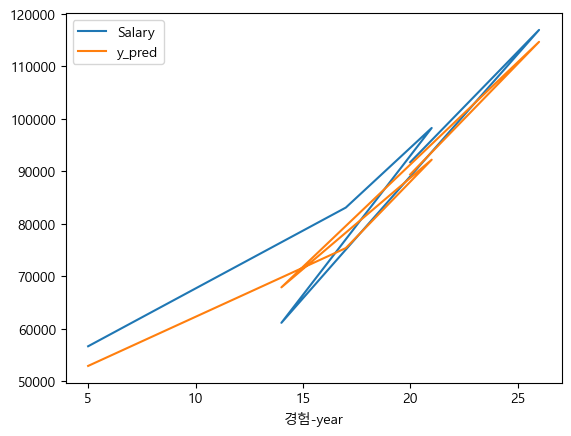

In [65]:
# 근무 년수에 따른 연봉
df_test.plot(kind='line')
plt.xlabel("경험-year")
plt.show()

In [66]:
# index reset 하기
df_test = df_test.reset_index(drop=True)
df_test

,Salary,y_pred
0,56642.0,52893.288808
1,83088.0,75366.141036
2,98273.0,92220.780207
3,61111.0,67875.190294
4,116969.0,114693.632435
5,91738.0,89411.673679


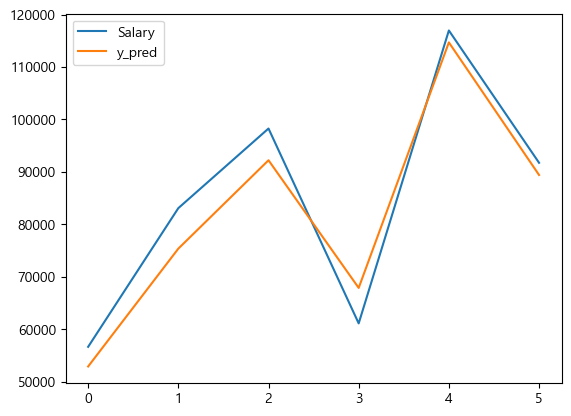

In [67]:
# 근무 년수에 따른 연봉 (꺾은선 그래프)
df_test.plot(kind='line')
plt.show()

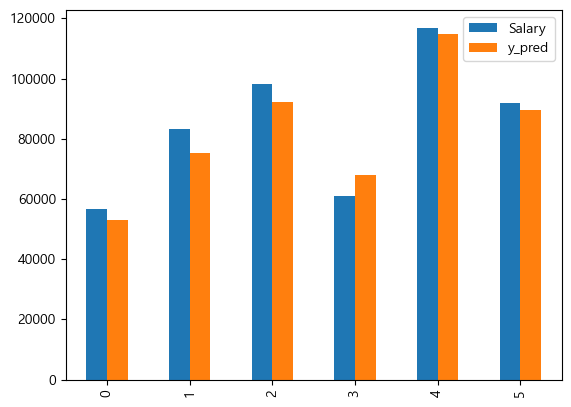

In [68]:
# 근무 년수에 따른 연봉 (막대그래프)
df_test.plot(kind='bar')
plt.show()

# 일반화

In [77]:
my_data = [5, 10]  # 연봉 예측
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred2 = model_lr.predict(np.array([5,10]).reshape(-1,1))
y_pred2

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 72557.03450777, 119375.47664964])

In [78]:
# 모범답안
# 수집한 데이터셋의 데이터가 아닌 현실 데이터를 넣어서 테스트
my_data = [5, 10]  # 연봉 예측, 2명의 데이터

In [ ]:
# 방법 1
my_data = [[5], [10]]  # 데이터가 많아지면 일일이 대괄호 붙이는거 불가

In [90]:
# 방법 2
my_data = np.array(my_data)
my_data = my_data.reshape(-1, 1)

In [91]:
model_lr.predict(my_data)

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 72557.03450777, 119375.47664964])